# Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", 0)

# Import Dataset

In [2]:
bookings = pd.read_csv("hotel_bookings.csv")

# Check Dataset Shape (Rows and Columns)

In [3]:
bookings.shape

(119390, 32)

# Check Column Names

In [4]:
bookings.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

# Check Dataset Info

In [5]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# Handle Duplicates

In [6]:
bookings.duplicated().sum() # Count duplicates

31994

In [7]:
bookings = bookings.drop_duplicates() # Remove duplicates

# Remove Unnecessary Columns

In [8]:
bookings = bookings[["hotel", "arrival_date_month", "adults", "reservation_status"]]
bookings

,hotel,arrival_date_month,adults,reservation_status
0,Resort Hotel,July,2,Check-Out
1,Resort Hotel,July,2,Check-Out
2,Resort Hotel,July,1,Check-Out
3,Resort Hotel,July,1,Check-Out
4,Resort Hotel,July,2,Check-Out
...,...,...,...,...
119385,City Hotel,August,2,Check-Out
119386,City Hotel,August,3,Check-Out
119387,City Hotel,August,2,Check-Out
119388,City Hotel,August,2,Check-Out


# Only include entries the were completed in July

In [9]:
bookings.drop(bookings[bookings["arrival_date_month"] != "July"].index, inplace = True)
bookings.drop(bookings[bookings["reservation_status"] == "Canceled"].index, inplace = True)
bookings

,hotel,arrival_date_month,adults,reservation_status
0,Resort Hotel,July,2,Check-Out
1,Resort Hotel,July,2,Check-Out
2,Resort Hotel,July,1,Check-Out
3,Resort Hotel,July,1,Check-Out
4,Resort Hotel,July,2,Check-Out
...,...,...,...,...
117715,City Hotel,July,2,Check-Out
117737,City Hotel,July,2,Check-Out
117772,City Hotel,July,3,Check-Out
117821,City Hotel,July,2,Check-Out


In [42]:
bookings['adults'].describe()

count    6951.00000
mean        2.00259
std         0.49573
min         0.00000
25%         2.00000
50%         2.00000
75%         2.00000
max         4.00000
Name: adults, dtype: float64

# Find outliers

<AxesSubplot:>

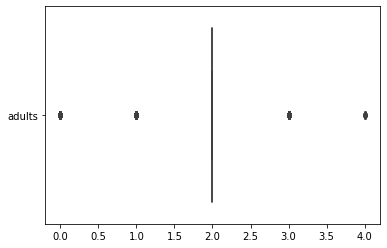

In [41]:
sns.boxplot(data = bookings, orient='h')